<a href="https://colab.research.google.com/github/zowette/clustering/blob/main/clustering_sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[analysis]
!pip install interpret-community
!pip install -U --pre pycaret

In [ ]:
import pandas as pd
data2017 = pd.read_stata("/content/sample_data/HCMST2017.dta")


In [ ]:

import matplotlib.pyplot as plt


In [ ]:
features = [
            "w6_sex_frequency",
            "w6_otherdate",
            "partyid7",
            "ppc10017",
            "ppc21310",
            "ppp20071",
            "ppp20072",
            "ppage",
            "ppagecat",
            "ppagect4",
            "ppeduc",
            "ppeducat",
            "ppethm",
            "ppgender",
            "pphhhead",
            "pphhsize",
            "pphouse",
            "ppincimp",
            "ppmarit",
            "ppmsacat",
            "PPREG4",
            "ppreg9",
            "pprent",
            "PPT01",
            "PPT25",
            "PPT612",
            "PPT1317",
            "PPT18OV",
            "ppwork",
            "w6_q6b",
            "w6_q9",
            "w6_q10",
            "w6_q12",
            "w6_q16",
            "w6_q17",
            "w6_attraction",
            "w6_q21a_year",
            "w6_same_sex_couple_gender",
            "w6_identity_all",
            "w6_q23",
            "w6_q25",
            "w6_q27",
            "w6_q28", 
            "w6_q32",
            "w6_q34",
            "w6_otherdate_all",
            "w6_number_people_met",
            "w6_otherdate_dichotomous",
            "relate_duration_at_w6_years",
            "year_fraction_met",
            "year_fraction_relstart",
            "age_when_met",
            "time_from_met_to_rel",
            "year_fraction_first_cohab",
            "time_from_rel_to_cohab",
            "w6_relationship_quality",
            "hcm2017q24_R_friend",
            "hcm2017q24_R_family",
            "hcm2017q24_R_sig_other",
            "hcm2017q24_R_neighbor",
            "hcm2017q24_P_cowork",
            "hcm2017q24_P_friend",
            "hcm2017q24_P_family",
            "hcm2017q24_P_sig_other",
            "hcm2017q24_P_neighbor",
            "hcm2017q24_btwn_I_cowork",
            "hcm2017q24_btwn_I_friend",
            "hcm2017q24_btwn_I_family",
            "hcm2017q24_btwn_I_sig_other",
            "hcm2017q24_btwn_I_neighbor",
            "hcm2017q24_school",
            "hcm2017q24_college",
            "hcm2017q24_mil",
            "hcm2017q24_church",
            "hcm2017q24_vol_org",
            "hcm2017q24_customer",
            "hcm2017q24_bar_restaurant",
            "hcm2017q24_party",
            "hcm2017q24_internet_other",
            "hcm2017q24_internet_dating",
            "hcm2017q24_internet_soc_network",
            "hcm2017q24_internet_game",
            "hcm2017q24_internet_chat",
            "hcm2017q24_internet_org",
            "hcm2017q24_public",
            "hcm2017q24_blind_date",
            "hcm2017q24_vacation",
            "hcm2017q24_single_serve_nonint",
            "hcm2017q24_business_trip",
            "hcm2017q24_work_neighbors",
            "hcm2017q24_met_online",
            "hcm2017q24_met_through_family",
            "hcm2017q24_met_through_friend",
            "hcm2017q24_met_through_as_nghbrs",
            "hcm2017q24_met_as_through_cowork",
            ]

In [ ]:
from sklearn import feature_selection
# df_data2017 = data2017.dropna(axis='columns')
droplist = ["ppagecat", "ppagect4","ppeduc"]
#df_data2017 = data2017[data2017.columns[pd.Series(data2017.columns).str.startswith('pp')]]
df_data2017 = data2017[features]
df_data2017 = df_data2017.dropna(axis='columns', thresh=3000)
df_data2017["ppage"]


0       30
1       55
2       47
3       28
4       59
        ..
3505    27
3506    24
3507    41
3508    32
3509    43
Name: ppage, Length: 3510, dtype: category
Categories (76, int64): [18 < 19 < 20 < 21 ... 90 < 91 < 92 < 93]

In [ ]:
# columns = df_data2017.columns

# for column in columns:
#     df_data2017[column]=df_data2017[column].astype('category').cat.codes

# df_data2017["ppage"]


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_df_kmeans = scaler.fit_transform(df_data2017)

In [ ]:
# from sklearn.cluster import KMeans
# kmeans_model = KMeans(n_clusters=4)
# clusters = kmeans_model.fit_predict(df_data2017)
# df_data2017.insert(df_data2017.columns.get_loc("ppc10017"), "Cluster", clusters)
# df_data2017.head(4)

In [ ]:
# import matplotlib.pyplot as plt
# ssd = []
# for k in range(2, 9):
#     kmeans_model = KMeans(n_clusters=k)
#     kmeans_model.fit(df_data2017)
#     ssd.append(kmeans_model.inertia_)
# plt.figure(figsize=(6, 4), dpi=100)
# plt.plot(range(2, 9), ssd, color="green", marker="o")
# plt.xlabel("Number of clusters (K)")
# plt.ylabel("SSD for K")
# plt.show()

In [ ]:
from pycaret.clustering import *

In [ ]:
clu = setup(df_data2017,
            session_id = 123, ignore_features=droplist)

In [ ]:
kmeans = create_model('kmeans', num_clusters=5)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans

KMeans(n_clusters=5, random_state=123)

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

partyid7 ppc10017   ppc21310   ppp20071  \
0         Leans Democrat      Yes  Every day  Not asked   
1  Not Strong Republican      Yes  Every day         No   
2         Leans Democrat      Yes  Every day        Yes   
3        Strong Democrat      Yes  Every day         No   
4        Strong Democrat      Yes  Every day         No   

                ppp20072 ppage                     ppeducat  \
0                  Never    30                 Some college   
1                  Never    55  Bachelor's degree or higher   
2  Once or twice a month    47  Bachelor's degree or higher   
3                  Never    28        Less than high school   
4    Once a year or less    59  Bachelor's degree or higher   

                ppethm ppgender pphhhead  ... hcm2017q24_vacation  \
0  White, Non-Hispanic     Male      Yes  ...                  no   
1  White, Non-Hispanic   Female      Yes  ...                  no   
2  White, Non-Hispanic     Male      Yes  ...                  no   
3  White, Non-Hispanic   Female       No  ...                  no   
4  White, Non-Hispanic   Female      Yes  ...                  no   

  hcm2017q24_single_serve_nonint hcm2017q24_business_trip  \
0                             no                       no   
1                             no                       no   
2                             no                       no   
3                             no                       no   
4                             no                       no   

  hcm2017q24_work_neighbors hcm2017q24_met_online  \
0                        no                   yes   
1                        no                    no   
2                        no                   yes   
3                        no                   yes   
4                        no                    no   

  hcm2017q24_met_through_family hcm2017q24_met_through_friend  \
0                            no                            no   
1                            no                            no   
2                            no                            no   
3                            no                            no   
4                            no                            no   

  hcm2017q24_met_through_as_nghbrs hcm2017q24_met_as_through_cowork    Cluster  
0                               no                               no  Cluster 4  
1                               no                              yes  Cluster 3  
2                               no                               no  Cluster 2  
3                               no                               no  Cluster 4  
4                              yes                               no  Cluster 3  

[5 rows x 86 columns]

In [ ]:
cluster0 = kmean_results[kmean_results["Cluster"] == "Cluster 0"].reset_index(drop=True)
cluster1 = kmean_results[kmean_results["Cluster"] == "Cluster 1"].reset_index(drop=True)
cluster2 = kmean_results[kmean_results["Cluster"] == "Cluster 2"].reset_index(drop=True)
cluster3 = kmean_results[kmean_results["Cluster"] == "Cluster 3"].reset_index(drop=True)
cluster4 = kmean_results[kmean_results["Cluster"] == "Cluster 4"].reset_index(drop=True)
cluster5 = kmean_results[kmean_results["Cluster"] == "Cluster 5"].reset_index(drop=True)



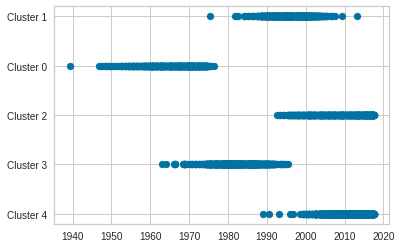

In [ ]:
plt.scatter(kmean_results["year_fraction_met"], kmean_results["Cluster"])

plt.show()

In [ ]:
plot_model(kmeans)

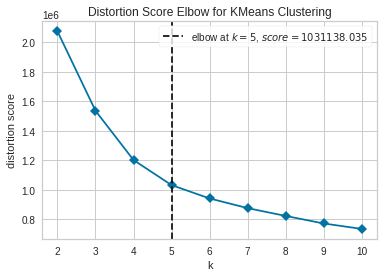

In [ ]:
plot_model(kmeans, plot = 'elbow')

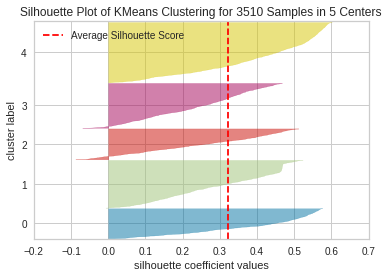

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution')

In [ ]:
# plot_model(kmeans, plot = 'tsne')

In [ ]:
kmean_results['ppage'].to_frame()

ppage
0       30
1       55
2       47
3       28
4       59
...    ...
3505    27
3506    24
3507    41
3508    32
3509    43

[3510 rows x 1 columns]

In [ ]:
from pycaret.classification import *

In [ ]:
df[columns] = df[columns].astype("Int8")
clf1 = setup(data = kmean_results, target = 'Cluster', ignore_features = droplist, numeric_features=['ppage','pphhsize','PPT01','PPT25','PPT612','PPT1317','PPT18OV','w6_q9','w6_q16','w6_q16','w6_q21a_year','w6_number_people_met'])

In [ ]:
# best = compare_models(exclude = ["knn","lda"])

In [ ]:
best  = create_model('et')   

In [ ]:
plot_model(estimator = best, plot = 'feature_all')

In [ ]:
interpret_model(best, plot = 'correlation', feature = 'year_fraction_met')

In [ ]:
best

In [ ]:


interpret_model(best, plot = 'correlation', feature = 'ppwork')


In [ ]:
plt.scatter(kmean_results["year_fraction_met"], kmean_results["Cluster"])
plt.show()

plt.scatter(kmean_results["year_fraction_relstart"], kmean_results["Cluster"])
plt.show()

plt.scatter(kmean_results["w6_q9"], kmean_results["Cluster"])
plt.show()

plt.scatter(kmean_results["ppage"], kmean_results["Cluster"])
plt.show()
plt.scatter(kmean_results["w6_q32"], kmean_results["Cluster"])
plt.show()

**Cluster one**

---



In [ ]:
# clu0 = setup(kmean_results[kmean_results['Cluster'].str.contains("0")],
#             session_id = 123, ignore_features=droplist)

In [ ]:
# kmeans0 = create_model('kmeans', num_clusters=2)

In [ ]:
# plot_model(kmeans0, plot = 'elbow')

In [ ]:
# plot_model(kmeans0, plot = 'distribution')

In [ ]:
# plot_model(kmeans0, plot = 'tsne')

In [ ]:
# plot_model(kmeans0, plot = 'cluster')

In [ ]:
# kmean_results0 = assign_model(kmeans0)
# kmean_results0.head()

